In [480]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from scipy.ndimage import gaussian_filter
import sys
from tqdm import tqdm
from functools import partial
import acd
from copy import deepcopy
sys.path.append('..')
sys.path.append('../..')
from os.path import join as oj
from transforms_torch import bandpass_filter
# plt.style.use('dark_background')
sys.path.append('../../dsets/mnist')
import dset
from model import Net, Net2c
from util import *
from numpy.fft import *
from torch import nn
from random import randint
from style import *
from captum.attr import *
import pickle as pkl
from torchvision import datasets, transforms
from sklearn.decomposition import NMF
from transform_wrappers import *
import visualize as viz
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from skorch import NeuralNetClassifier
import pandas as pd
from models import FNN
import attributions
device = 'cuda'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [481]:
out_dir = '/scratch/users/vision/data/cosmo/sim'
os.listdir(out_dir)

['n=50000_p=100_knockout=12pid=66257609305319508671.pkl']

In [482]:
results = pkl.load(open(oj(out_dir, 'n=50000_p=100_knockout=12pid=66257609305319508671.pkl'), 'rb'))

[0.9985, 0.948, 0.924, 0.9225]


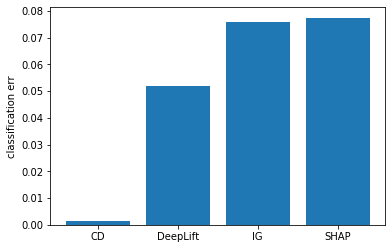

In [486]:
r = results['results']
accs = []
ks = sorted(r.keys())
for k in ks:
#     print(k)
    vals = np.vstack(r[k])
#     print(vals.shape)
    args = np.argmax(vals, axis=1)
#     print(args)
    num_correct = np.sum(args == idx_knockout)
    accs.append(num_correct / vals.shape[0])
plt.bar(ks, 1-np.array(accs))
plt.ylabel('classification err')
plt.show()

In [462]:
prob = 0.948
num = 1000
print(np.sqrt(prob * (1-prob)) / np.sqrt(num))

0.007021111023192843


In [ ]:
# d = scores.size
# idxs = np.zeros(d).astype(bool)
# idxs[idx_zero - window: idx_zero + window + 1] = 1
# plt.plot(np.arange(d)[idxs], scores[idxs], 'o')
# plt.plot(np.arange(d)[~idxs], scores[~idxs], 'o')
# plt.show()